In [1]:
import Example3_code as ep3

SyntaxError: invalid syntax (<ipython-input-30-8415aea5f438>, line 1)

https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1

## Attempt number 3

In [2]:
#p3.load_data_set()

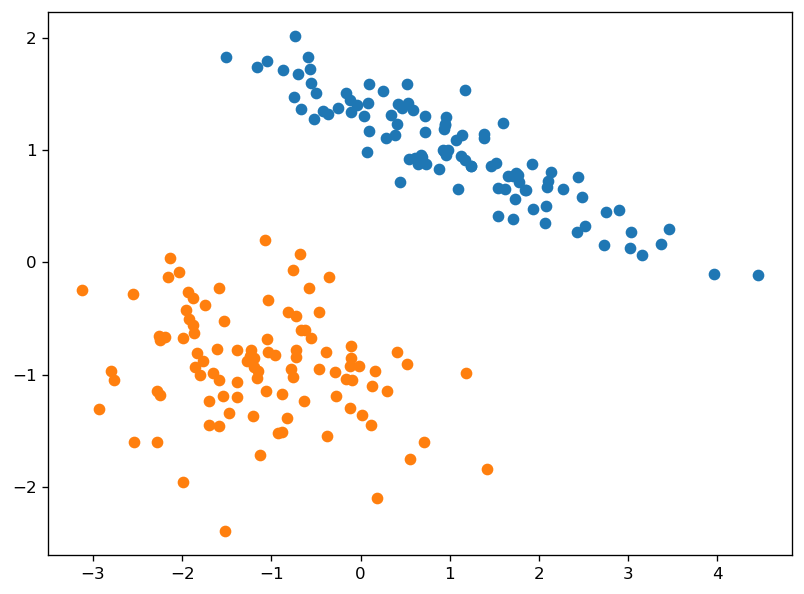

<Figure size 432x288 with 0 Axes>

In [4]:
ep3.compute()

<img src="animation1.gif" width="750" align="center">

In [2]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import Perc_code as p

"""
This code is a modification for the code provided in the guide:
https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1
"""


# loading the data
# %matplotlib inline
def load_data_set(show = True, line = False, weights = [], xy = False):
    """ Show- true graph, else no grapth"""
    #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

    # return the data and the d
    X,y = load_iris(return_X_y=True)

    if (xy == True):
        #plt.scatter(X[:50, 0], X[:50, 1],
        #plt.scatter(X[50:100, 0], X[50:100, 1]
        return X[0:100,0], X[0:100,1]


    if (show == True):
        # plt.scatter(x, y,...)
        # first fifty enteries
        plt.scatter(X[:50, 0], X[:50, 1],
                    color='green', marker='x', label='setosa')

        # last thifty entires
        plt.scatter(X[50:100, 0], X[50:100, 1],
                    color='red', marker='o', label='versicolor')
        plt.xlabel('sepal length')
        plt.ylabel('petal length')
        plt.legend(loc='upper right')
        plt.show()

    if (line == True):
        plt.scatter(X[:50, 0], X[:50, 1],
                    color='green', marker='x', label='setosa')

        # last thifty entires
        plt.scatter(X[50:100, 0], X[50:100, 1],
                    color='red', marker='o', label='versicolor')
        plt.xlabel('sepal length')
        plt.ylabel('petal length')
        plt.legend(loc='upper right')
        plt.show()
        line_plt = []
        # Here i am calculating slope and intercept with given three weights
        for i in np.linspace(np.amin(X[:50,:1]),np.amax(X[:50,:1])):
            slope = -(weights[0]/weights[2])/(weights[0]/weights[1])
            intercept = -weights[0]/weights[2]

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            plt.plot(i, y,'ko')
            #line_plt.append([i,y,'ko'])

        #plt.scatter(line_plt[:,0], line_plt[:,1],
        #            color='red', marker='o', label='versicolor')
        #plt.show()
    else:
        return X,y



class Perceptron:
    """ Class perceptron with methods
    """
    def fit(self, X, y, n_iter=100):

        n_samples = X.shape[0]
        n_features = X.shape[1]

        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))

        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]

    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return

        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)

        return y

    def score(self, X, y):
        pred_y = self.predict(X)

        return np.mean(y == pred_y)


    
    
#############  Code for plotting  #############

def plot_data_points(ax, X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])

def plot_decision_boundary(ax, clf, X, p):
    X_cpy = X.copy()
    margin = 0.5
    x_min = np.min(X_cpy[:, 0])-margin
    x_max = np.max(X_cpy[:, 0])+margin
    y_min = np.min(X_cpy[:, 1])-margin
    y_max = np.max(X_cpy[:, 1])+margin
    n = 1000
    x = np.linspace(x_min, x_max, num=n)
    y = np.linspace(y_min, y_max, num=n)
    x, y = np.meshgrid(x, y)
    X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
    X_cpy = polynomial_features(X_cpy, p)
    z = clf.predict(X_cpy)
    z = z.reshape((n, n))
    ax.contour(x, y, z, levels=[0])

def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)



################# Animation #################


def anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level):
    clf = Perceptron()
    clf.weights = weights

    plt.clf()
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(16,6))

    if iteration_level:
        plot_data_points(ax_train, X_train, y_train)
    else:
        mask = np.ones((n_samples,), dtype=bool)
        mask[j] = False
        plot_data_points(ax_train, X_train[mask, :], y_train[mask])
        ax_train.scatter(X_train[j, 0], X_train[j, 1], c='lime')

    plot_data_points(ax_test, X_test, y_test)

    plot_decision_boundary(ax_train, clf, X, p)
    plot_decision_boundary(ax_test, clf, X, p)

    ax_train.set_title('Train')
    ax_test.set_title('Test')

    if iteration_level:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}', fontsize=14)
    else:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}; Point: {j+1}/{n_samples}', fontsize=14)
    k = i if iteration_level else i*n_samples+j
    plt.savefig(f'{out_folder}/frame{k}.png')
    plt.close(fig)

def perceptron_anim(X, y, X_train, y_train, X_test, y_test, out_folder, iteration_level, p=1, n_iter=100):

    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]

    weights = np.zeros((n_features+1,))

    X_train = np.concatenate([X_train, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y_train[j]*np.dot(weights, X_train[j, :]) <= 0:
                weights += y_train[j]*X_train[j, :]

            if not iteration_level:
                anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)
        if iteration_level:
            anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)


[False False  True  True False  True False False False  True False  True
 False False  True  True False False  True False False  True  True False
 False False False False False False  True False False  True False  True
  True  True False  True  True  True  True False  True False False False
  True  True  True  True False  True  True  True  True  True  True  True
 False  True False False False  True False False False  True  True False
 False False False False  True  True  True False False False False False
 False False False  True False False  True  True  True False False  True
 False  True  True  True  True  True  True  True  True False  True  True
 False  True False  True  True  True  True  True False False False  True
  True  True False False  True  True False  True  True  True False False
  True False  True False False  True  True  True  True  True  True False
  True  True  True  True False False False False False  True  True False
 False False  True False False False  True  True  T

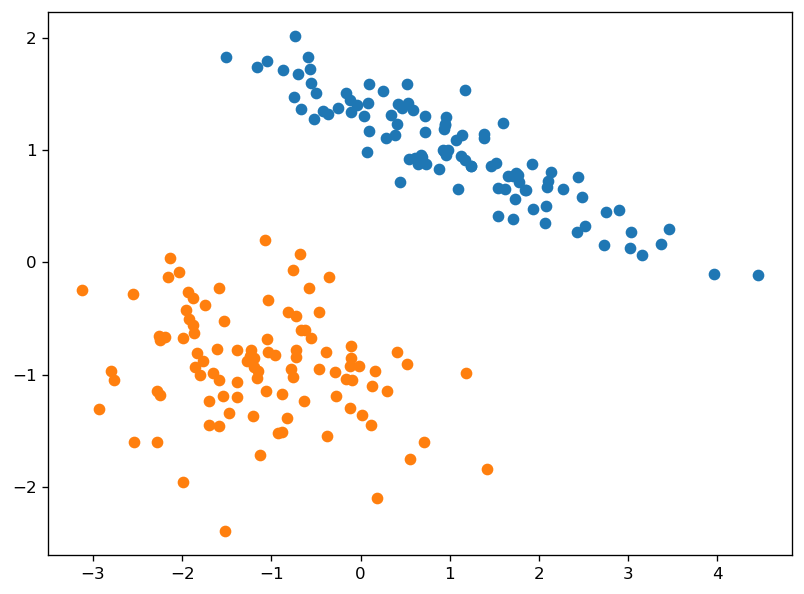

In [12]:
import Example3_code as ep3

X, y = make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)
X, y = make_circles(n_samples=200, noise=0.03, factor=0.7)



#X,y = load_data_set(show = False, xy = True)
X = np.load('X_lin_sep.npy')
y = np.load('y_lin_sep.npy')

def plot_data_points(ax, X, y):
    neg_class = (y <= 0 )
    pos_class = (y == 1)
    print(neg_class)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])



fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)





plt.savefig('output/lin_sep/figure.png')
plt.show()

In [13]:
X = np.load('X_lin_sep.npy')
y = np.load('y_lin_sep.npy')
print(len(X))
print(len(y))
print(y)

200
200
[ 1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1
  1  1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1 -1  1
  1  1  1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1
 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1 -1 -1  1  1
  1 -1 -1  1  1  1  1  1]


In [14]:
x1, y1 = ep3.load_data_set(show = False, xy = True)
print(len(x1))
print(len(y1))
print(y1)

100
100
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


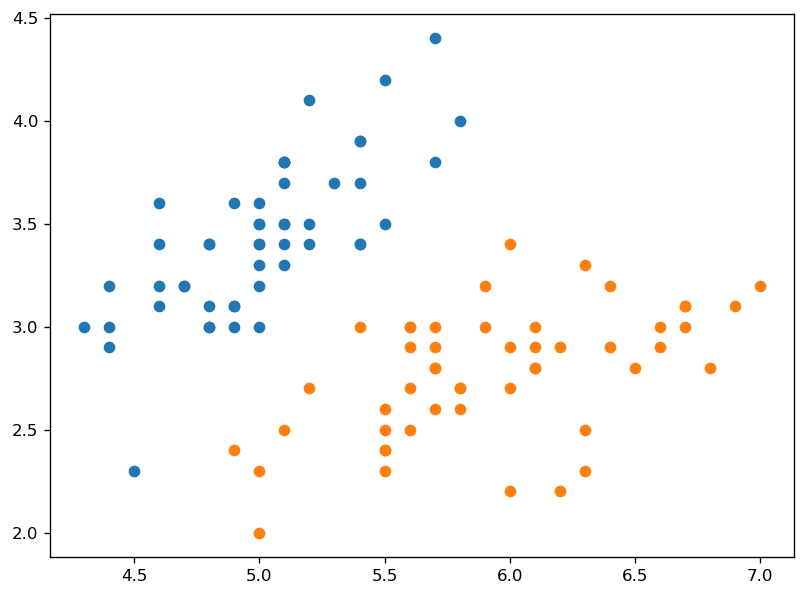

In [15]:

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))



plot_data_points(ax, x1, y1)
#plt.savefig('output/lin_sep/figure.png')


plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_sep/anim', iteration_level=False, p=1, n_iter=2)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron.score(X_test, y_test)